# Descriptive Analysis for Rocket Mortgage Classic
## Adie Maki
## Final Project

## Import Libraries and Load Data

In [3]:
# import libraries needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import bartlett
from scipy.stats import ttest_rel
import numpy as np

## Load the cleaned DataSet

In [5]:
# load the dataset that was cleaned and merged 
df = pd.read_csv("CleanedDataset_RocketMortgage.csv")

# review the data
df.head()

,PLAYER,R1,R2,R3,R4,TOT,SCORE_NUMERIC,PreEvent_temp,PreEvent_precip,PreEvent_wind,R1_temp,R1_wind,R1_precip,R2_temp,R2_wind,R2_precip,EARNINGS,EARNINGS_num,FEDEX PTS
0,T. Finau,64.0,66.0,65.0,67.0,262.0,-26.0,72.14,0.015748,11.1647,74.12,23.4804,0.0,70.34,18.8764,0.0,"$1,512,000",1512000.0,500
1,P. Cantlay,70.0,65.0,66.0,66.0,267.0,-21.0,72.14,0.015748,11.1647,74.12,23.4804,0.0,70.34,18.8764,0.0,"$635,600",635600.0,208
2,C. Young,71.0,63.0,65.0,68.0,267.0,-21.0,72.14,0.015748,11.1647,74.12,23.4804,0.0,70.34,18.8764,0.0,"$635,600",635600.0,208
3,T. Pendrith,64.0,65.0,66.0,72.0,267.0,-21.0,72.14,0.015748,11.1647,74.12,23.4804,0.0,70.34,18.8764,0.0,"$635,600",635600.0,208
4,S. Jaeger,67.0,68.0,65.0,68.0,268.0,-20.0,72.14,0.015748,11.1647,74.12,23.4804,0.0,70.34,18.8764,0.0,"$344,400",344400.0,110


## Section 1: Summary Statistics

### Scoring Variables

In [8]:
# summary statistics for scoring variables
score_cols = ["R1", "R2", "R3", "R4", "TOT"]

# print the dataframe
print("Summary Statistics for Round Scores:")
df[score_cols].describe()


Summary Statistics for Round Scores:


,R1,R2,R3,R4,TOT
count,155.000000,153.000000,75.000000,75.000000,155.000000
mean,70.677419,71.058824,69.706667,69.160000,208.012903
std,2.871570,2.748768,3.012467,2.686503,67.652280
min,64.000000,63.000000,65.000000,63.000000,73.000000
25%,69.000000,69.000000,67.000000,67.000000,144.000000
50%,70.000000,71.000000,69.000000,69.000000,151.000000
75%,72.000000,73.000000,72.000000,71.000000,277.500000
max,80.000000,77.000000,78.000000,75.000000,287.000000


### Weather Descriptive Statistics

In [10]:
# descriptive statistics for weather
#  since the weather data is the same for all players, I did a descriptive summary 
weather_cols = ["PreEvent_temp","PreEvent_wind","PreEvent_precip",
                "R1_temp","R1_wind","R1_precip",
                "R2_temp","R2_wind","R2_precip"]

# print the descriptive statistics 
print("Weather Conditions for Tournament:")
print(df[weather_cols].iloc[0])


Weather Conditions for Tournament:
PreEvent_temp      72.140000
PreEvent_wind      11.164700
PreEvent_precip     0.015748
R1_temp            74.120000
R1_wind            23.480400
R1_precip           0.000000
R2_temp            70.340000
R2_wind            18.876400
R2_precip           0.000000
Name: 0, dtype: float64


### Earnings Summary Statistics

In [12]:
# summary statistics for earnings Rocket Mortage Tournamnet 2022 
print("Summary Statistics: Earnings ($)")
print(df["EARNINGS_num"].describe())
print()

# convert max/min/mean to $ formatting for easier interpretation 
print(f"Average Earnings: ${df['EARNINGS_num'].mean():,.2f}")
print(f"Median Earnings:  ${df['EARNINGS_num'].median():,.2f}")
print(f"Highest Earnings: ${df['EARNINGS_num'].max():,.2f}")
print(f"Lowest Earnings:  ${df['EARNINGS_num'].min():,.2f}")

Summary Statistics: Earnings ($)
count    7.500000e+01
mean     1.142848e+05
std      2.122147e+05
min      1.638000e+04
25%      1.963500e+04
50%      3.654000e+04
75%      1.136100e+05
max      1.512000e+06
Name: EARNINGS_num, dtype: float64

Average Earnings: $114,284.79
Median Earnings:  $36,540.00
Highest Earnings: $1,512,000.00
Lowest Earnings:  $16,380.00


### FEDEX Points Summary Statistics

In [14]:
# summary statistics for FedEx Points
#  ranking system used to determine player performance throughout the season 
#  determines what players make the playoffs and the Tour Championship 
print("Summary Statistics: FedEx Points")
print(df["FEDEX PTS"].describe())
print()

# print for easier viewing 
print(f"Average FedEx Points: {df['FEDEX PTS'].mean():.2f}")
print(f"Median FedEx Points:  {df['FEDEX PTS'].median():.2f}")
print(f"Highest FedEx Points: {df['FEDEX PTS'].max():.2f}")
print(f"Lowest FedEx Points:  {df['FEDEX PTS'].min():.2f}")

Summary Statistics: FedEx Points
count    156.000000
mean      18.583333
std       51.877518
min        0.000000
25%        0.000000
50%        0.000000
75%       16.000000
max      500.000000
Name: FEDEX PTS, dtype: float64

Average FedEx Points: 18.58
Median FedEx Points:  0.00
Highest FedEx Points: 500.00
Lowest FedEx Points:  0.00


### Round 1 and 2 Weather vs Score

In [16]:
# round level weather vs average score for easy comparison of how weather could affect scoring

# create dataframe that links R1 and R2, average score, and weather conditions for that round
round_df = pd.DataFrame({
    "Round": ["R1","R2"],
    "AvgScore": [df["R1"].mean(), df["R2"].mean()],  # average player score 
    "Wind": [df["R1_wind"].iloc[0], df["R2_wind"].iloc[0]],  # weather conditions
    "Temp": [df["R1_temp"].iloc[0], df["R2_temp"].iloc[0]],
    "Precip": [df["R1_precip"].iloc[0], df["R2_precip"].iloc[0]]})

# display the reuslts 
display(round_df)


,Round,AvgScore,Wind,Temp,Precip
0,R1,70.677419,23.4804,74.12,0.0
1,R2,71.058824,18.8764,70.34,0.0


### Average Scores for all Rounds

In [18]:
# compute the average scores for all rounds 
r1_mean = df["R1"].mean()
r2_mean = df["R2"].mean()
r3_mean = df["R3"].mean()
r4_mean = df["R4"].mean()

# show the results 
print("Average R1:", r1_mean)
print("Average R2:", r2_mean)
print("Average R3:", r3_mean)
print("Average R4:", r4_mean)
print("Change in scoring:", r4_mean - r1_mean)


Average R1: 70.6774193548387
Average R2: 71.05882352941177
Average R3: 69.70666666666666
Average R4: 69.16
Change in scoring: -1.517419354838708


## Section 2: Visualizations 

### Temperature and Wind by Round Bar Chart

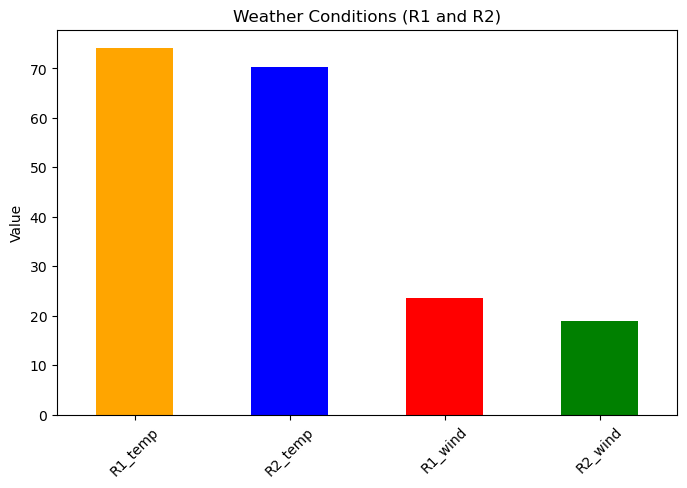

In [21]:
# bar chart of average tempature and wind for rounds 1 and 2

# select round 1 and round 2 temperature and wind values
# these are the average weather metrics for each round
weather_means = df[["R1_temp","R2_temp","R1_wind","R2_wind"]].iloc[0]

# create the plot 
plt.figure(figsize=(8,5))

# plot the four metrics as a bar chart
# colors correspond to each metric
weather_means.plot(kind="bar", color=["orange","blue","red","green"])
plt.title("Weather Conditions (R1 and R2)")  # title
plt.ylabel("Value")  # axis label
plt.xticks(rotation=45)  # rotate the x lables so theycan be read
plt.show()  # display plot


### Histogram of Round 1 and Round 2 Scores

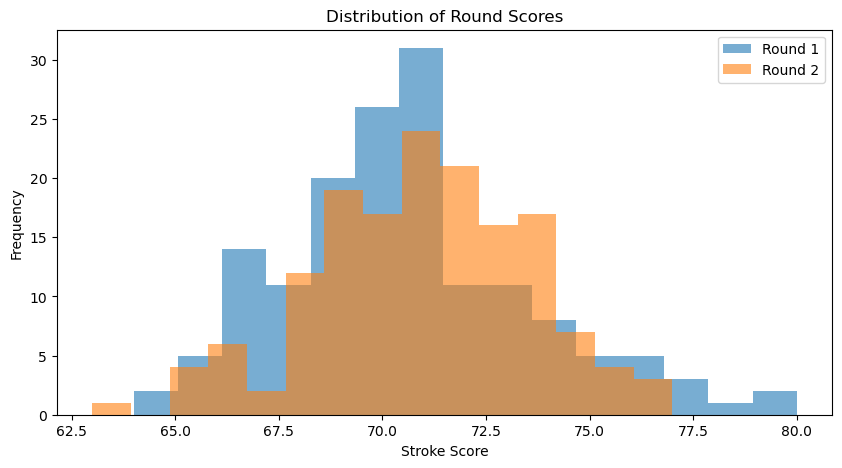

In [23]:
# histogram of round scores 

# create a new histogram 
plt.figure(figsize=(10,5))

# plot histogram for round 1 scores 
# dropna() makes sure that missing values don't interfere with the distribution
plt.hist(df["R1"].dropna(), bins=15, alpha=0.6, label="Round 1")  # number of bins for scoring groups and transparency so overlaps are seen
plt.hist(df["R2"].dropna(), bins=15, alpha=0.6, label="Round 2")
plt.xlabel("Stroke Score")  # label axis 
plt.ylabel("Frequency")
plt.title("Distribution of Round Scores")  # title 
plt.legend()  # add a legend 
plt.show()  # display the chart 

### Boxplot of Scores Across All Rounds 

C:\Users\adiem\AppData\Local\Temp\ipykernel_72820\3323680453.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_melt, x="Round", y="Score", palette="Set2")  # colors for each round are different


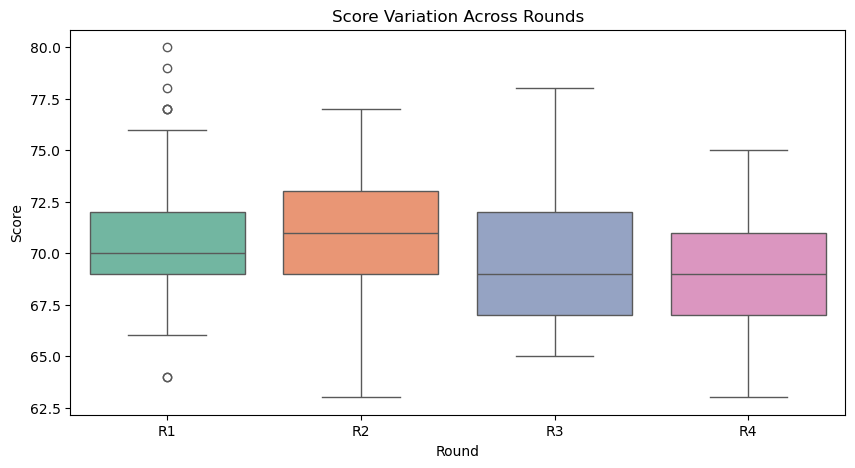

In [25]:
# boxplot of scores across all rounds

# reshape the dataframe with wide format for R1, R2, R3, R4 columns
#  round and score 
# new column shows the round
# new column showing scores
df_melt = df.melt(value_vars=["R1","R2","R3","R4"], var_name="Round", value_name="Score")

# create the boxplot figure 
plt.figure(figsize=(10,5))

# boxplot showing score distribution per round
sns.boxplot(data=df_melt, x="Round", y="Score", palette="Set2")  # colors for each round are different 
plt.title("Score Variation Across Rounds")  # title
plt.show()  # display the plot


### Boxplot of Rounds 1 and 2 Only 

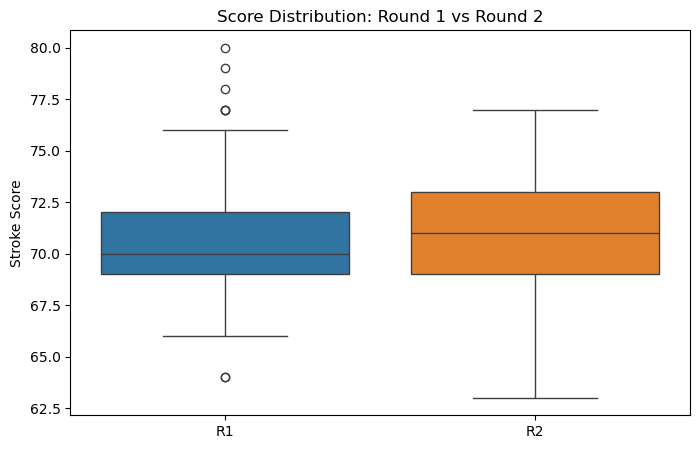

In [27]:
# boxplot of rounds 1 and 2 scores 

# create a new figure 
plt.figure(figsize=(8,5))

# boxplot from the R1 and R2 columns
sns.boxplot(data=df[["R1","R2"]])
plt.title("Score Distribution: Round 1 vs Round 2")  # title
plt.ylabel("Stroke Score")  # axis label
plt.show()  # display plot


## Section 3: Hypothesis Testing 

### Does score consistency across rounds influence a golfer's overall tournament performance?

In [30]:
# null: there is no difference in final tournament scores between consistent and inconsistent golfers 
# alternative: golfers with more consistent round to round scores have significantly lower final tournament scores 

# create score_variance 
df["score_variance"] = df[["R1", "R2", "R3", "R4"]].var(axis=1)

# find the median score variance to split players into two groups
median_var = df["score_variance"].median()

# consistent: players who round to round variance is below or equal to the median
# inconsistent: players whose variance is above the median
consistent = df[df["score_variance"] <= median_var]["TOT"]
inconsistent = df[df["score_variance"] > median_var]["TOT"]

# t test
t_stat, p_val = ttest_ind(consistent.dropna(), inconsistent.dropna())

# print results 
print("T-test:", t_stat)
print("P-value:", p_val)

T-test: -3.5647003717819197
P-value: 0.0004881016883182846


#### Because the p-value (0.00048) is well below 0.05, we reject the null hypothesis and can conclude that golfers with more consistent scores across rounds perfrom significantly better in total tournamnet score than those with higher round-to-round variations at the 2022 Rocket Classic. 

### Correlation of Numeric Score and Earnings 

In [33]:
# does score predict earnings?
# pearson correlation between score and earnings 
corr = df["SCORE_NUMERIC"].corr(df["EARNINGS_num"])

# print results 
print("Correlation between Score and Earnings:", corr)


Correlation between Score and Earnings: -0.7823934686911259


### Do Better Scores Lead to Significantly Higher Earnings?

In [35]:
# do better scores lead to significantly higher earnings?

# null: mean earnings of the best 20% scorers equals the mean earnings of the worst 20% 
# alternative: mean earnings differ between the two groups 

# determine score cutoffs
# best 20% are the lowest scores and better performace
# worst 20% are the highest scores and worse performance 
q20 = df["SCORE_NUMERIC"].quantile(0.20)
q80 = df["SCORE_NUMERIC"].quantile(0.80)

# earnings for the best and worst 20% of scoring players
best = df[df["SCORE_NUMERIC"] <= q20]["EARNINGS_num"]
worst = df[df["SCORE_NUMERIC"] >= q80]["EARNINGS_num"]

# independent t test comparing earnings between best and worst performers 
t_stat, p_val = ttest_ind(best.dropna(), worst.dropna(), nan_policy="omit")

# print results 
print("T-test: Best 20% vs Worst 20% Earnings")
print("t-statistic:", t_stat)
print("p-value:", p_val)


T-test: Best 20% vs Worst 20% Earnings
t-statistic: 4.607314945056296
p-value: 5.838945220014165e-05


#### Because the p-value is fr below 0.05, we reject the null hypothesis and conclude that the best 20% scorers earn significantly more than the worst 20%, meaning that scoring performance has a strong and statistically significant meaningful impcat on earnings at the 2022 Rocket Classic. 

### Scatterplot with Trendline: Score and Earnings

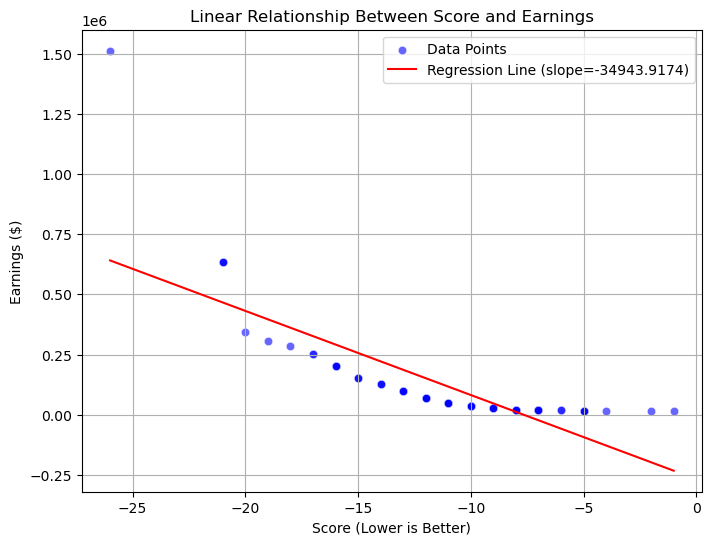

Regression Equation: Earnings = -267768.7098 + (-34943.9174 × Score)


In [38]:
# linear regression model or score and earnings

# set x (independent variable) and y (dependent variable)
x = df["SCORE_NUMERIC"]
y = df["EARNINGS_num"]

# drop any missing values just in case 
valid = ~(x.isna() | y.isna())
x = x[valid]
y = y[valid]

# use numpy polyfit for regression coefficients 
# slope and intercept 
b, a = np.polyfit(x, y, 1)

# scatterplot and regression line
plt.figure(figsize=(8,6))

# plot points 
sns.scatterplot(x=x, y=y, color="blue", alpha=0.6, label="Data Points")

# compute the predicted earnings with regression line
y_pred = a + b * x
plt.plot(x, y_pred, color="red", label=f"Regression Line (slope={b:.4f})")

# chart labels and formatting
plt.title("Linear Relationship Between Score and Earnings")
plt.xlabel("Score (Lower is Better)")
plt.ylabel("Earnings ($)")
plt.legend()
plt.grid(True)
plt.show()

# print regression equation
print(f"Regression Equation: Earnings = {a:.4f} + ({b:.4f} × Score)")


### Do Higher FedEx Point Earners Score Better on Average?

In [40]:
# do higher FedEx point earners score better on average?

# null: mean score of the top 25% FedEx earners quals the mean score of the bottom 25% earners
# alternative: mean scores are different 

# t test
# determine percentile cutoffs for FedEx points
q75 = df["FEDEX PTS"].quantile(0.75)
q25 = df["FEDEX PTS"].quantile(0.25)

# select scores from top and bottom 25% FedEx earners  
top_players = df[df["FEDEX PTS"] >= q75]["SCORE_NUMERIC"]
bottom_players = df[df["FEDEX PTS"] <= q25]["SCORE_NUMERIC"]

# perform independent t test
t_stat, p_val = ttest_ind(top_players.dropna(), bottom_players.dropna(), nan_policy="omit")

# print results 
print("T-test: Top 25% FedEx vs Bottom 25% FedEx")
print("t-statistic:", t_stat)
print("p-value:", p_val)


T-test: Top 25% FedEx vs Bottom 25% FedEx
t-statistic: -1.8904064205911144
p-value: 0.06530105496910132


#### Because the p-value (0.065) is above 0.05, we fail to reject the null, meaning that the difference in scoring between top and bottom FedEx point earners is suggestive but is not statistically significant at the 2022 Rocket Classic. 

### Correlation of Score and FedEx Points

In [43]:
# correlation of FedEx points and score 

# pearson correlation between score and FedEx points
# see if players that perform well tend to earn more points 
corr_fedex = df["SCORE_NUMERIC"].corr(df["FEDEX PTS"])

# print results 
# strong negative correlation means better score lead to more FedEx points
print("Correlation between Score and FedEx Points:", corr_fedex)


Correlation between Score and FedEx Points: -0.7756654478707642


### Visual of FedEx Cup point Earners and Score 

C:\Users\adiem\AppData\Local\Temp\ipykernel_72820\2564754091.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="FedEx_Group", y="SCORE_NUMERIC", data=compare_df, palette="Set2")


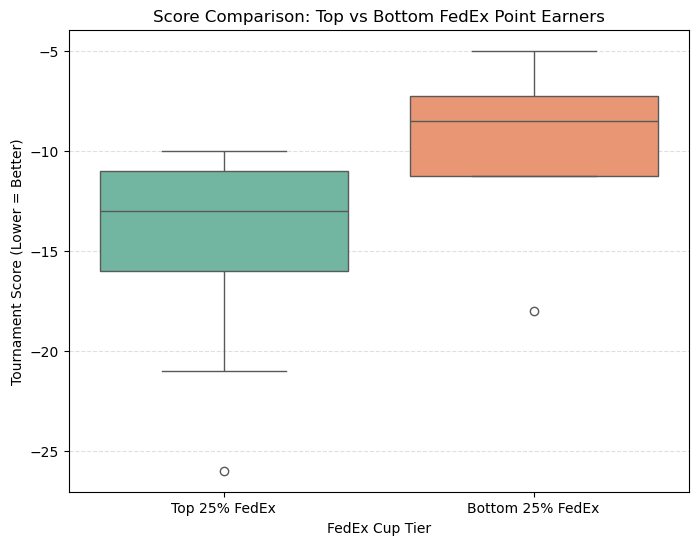

In [45]:
# Boxplot: scores of Top vs Bottom FedEx Earners

# create a copy for plotting
plot_df = df.copy()

# classify players into top and bottom 25% FedEx groups
# top performers: FedEx points >= 75th percentile
# bottom performers: FedEx points <= 25th percentile
plot_df["FedEx_Group"] = "Middle"
plot_df.loc[plot_df["FEDEX PTS"] >= q75, "FedEx_Group"] = "Top 25% FedEx"
plot_df.loc[plot_df["FEDEX PTS"] <= q25, "FedEx_Group"] = "Bottom 25% FedEx"

# keep only the two groups being compared
compare_df = plot_df[plot_df["FedEx_Group"].isin(["Top 25% FedEx", "Bottom 25% FedEx"])]

# create the boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x="FedEx_Group", y="SCORE_NUMERIC", data=compare_df, palette="Set2")

# formatting
plt.title("Score Comparison: Top vs Bottom FedEx Point Earners")
plt.xlabel("FedEx Cup Tier")
plt.ylabel("Tournament Score (Lower = Better)")
plt.grid(axis="y", linestyle="--", alpha=0.4)

plt.show()  # show plot


### Scatterplot of Score and FedEx Points

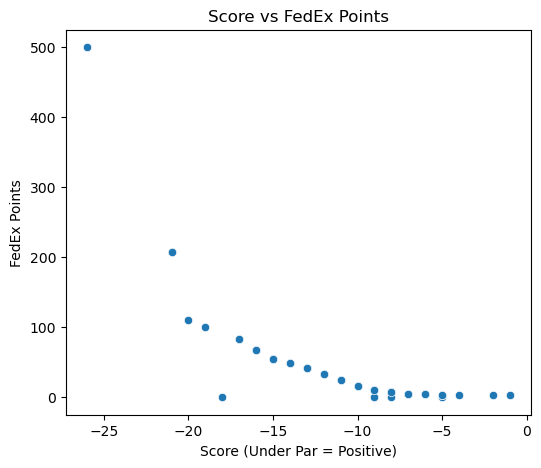

In [47]:
# scatterplot of score and FedEx points 

plt.figure(figsize=(6,5))

# plot data points 
sns.scatterplot(x=df["SCORE_NUMERIC"], y=df["FEDEX PTS"])
plt.title("Score vs FedEx Points")  # title 
plt.xlabel("Score (Under Par = Positive)")  # axis labels 
plt.ylabel("FedEx Points")
plt.show()  # show chart 


### Do golfers improve or worsen from Round 1 to Round 2?

In [49]:
# paired t-test: rounds 1 and 2

# Null: mean score in R1 = mean score in R2 
# Alternative: mean score in R1 != mean score in R2
# drop any rows where either R1 or R2 is missing just in case 
paired_df = df.dropna(subset=["R1","R2"])

# paired t test
# comparing same players across rounds
t_stat, p_val = ttest_rel(paired_df["R1"], paired_df["R2"])

# print test results 
print("Paired T-Test (R1 vs R2):")
print("T-statistic:", t_stat)
print("P-value:", p_val)


Paired T-Test (R1 vs R2):
T-statistic: -1.5974320434862714
P-value: 0.1122462636342655


#### Because the p-value is well above 0.05, we fail to reject the null. There is no statistically significant difference between Round 1 and Round 2 scores at the 2022 Rocket Classic. 

### Is scoring more consistent in Round 1 or Round 2?

In [52]:
# variance test: differences in scores from R1 to R2

# bartlett's test checks whether two groups have equal variances 
# lower variance is more consitent scoring 
# null hypothesis: variance of R1 = variance of R2
# altenative hypothesis: variance of R1 != R2

# drop missing values
bart_stat, bart_p = bartlett(df["R1"].dropna(), df["R2"].dropna())

# print results
print("Bartlett Test for Equal Variances")
print("Statistic:", bart_stat)
print("P-value:", bart_p)


Bartlett Test for Equal Variances
Statistic: 0.2911507301717894
P-value: 0.5894840573396538


#### Because the p-value is far greater than 0.05, we fail to reject the null. Round 1 and Round 2 have statistically similar score variance at the 2022 Rocket Classic.

### Does Consistency Impact Earnings?

In [55]:
# does consistency matter to earnngs 

# null: no difference in earnings between consistent golfers and inconsistent golfers 
# alternative: consistent golfers earn significantly more than inconsistent golfers 

# calculate each player's score variance across all rounds 
# lower variance = more consistent golfer 
df["score_variance"] = df[["R1","R2","R3","R4"]].var(axis=1)

# determine the median variance to split players into
# consistent (variance <= median)
# inconsistent (variance > median)
median_var = df["score_variance"].median()

# earnings for consistent golfers 
consistent = df[df["score_variance"] <= median_var]["EARNINGS_num"]
# earnings for inconsistent golfers 
inconsistent = df[df["score_variance"] > median_var]["EARNINGS_num"]

# run a t-test comparing earnings per group
t_stat, p_val = ttest_ind(consistent.dropna(), inconsistent.dropna(), nan_policy="omit")

# print results
print("T-test: Consistent vs Inconsistent Golfers (Earnings)")
print("t-statistic:", t_stat)
print("p-value:", p_val)



T-test: Consistent vs Inconsistent Golfers (Earnings)
t-statistic: 0.17370106675673158
p-value: 0.8625811774947757


#### Because the p-value is well above 0.05, we fail to reject the null. Consistent golfers with lower round variance did not earn significantly more than inconsistent golfers in the 2022 Rocket Classic. 

### Do Golfers Improve From Round 1 to Round 4?

In [58]:
# do golfers improve from round 1 to round 4

# null: there is no improvement or decline in rounds
# alternative: scoring changes between R1 and R4

# remove any missing values just in case
paired_r14 = df.dropna(subset=["R1","R4"])

# t-test comparing round 1 and round 4 scores 
t_stat, p_val = ttest_rel(paired_r14["R1"], paired_r14["R4"])

# print results 
print("Paired T-test: R1 vs R4")
print("t-statistic:", t_stat)
print("p-value:", p_val)


Paired T-test: R1 vs R4
t-statistic: -1.04781259161839
p-value: 0.298135279114874


#### Because the p-value is well above 0.05, we fail to reject the null. Golfers did not significantly improve or worsen from Round 1 to Round 4 at the 2022 Rocket Classic.

### Do Early Round Scores Predict Final Perforance?

In [61]:
# do early round scores predict final performance?
# Correlation test 

# null: no linear relationship between R1 and final total score
# alternative: a linear relationship exists and R1 helps predict final performance 

# pearson correlation for round 1 score and total score
corr, p_val = stats.pearsonr(df["R1"].dropna(), df["TOT"].dropna())

# print results 
print("Correlation between R1 and TOT:", corr)
print("p-value:", p_val)




Correlation between R1 and TOT: -0.6289119071613756
p-value: 1.9110429137204353e-18


#### Because the p-value is well below 0.05, we rejct the null. Early round scores strongly predict final tournament performance at the 2022 Rocket Classic. 